In [2]:
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,CenterCrop
from keras.callbacks import EarlyStopping
from keras.models import load_model
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
dir = r"./Data/Dataset_corretto"
train_set_path = r"C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\Data\Train_set"
test_set_path = r"C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\Data\Test_set"
valid_set_path = r"C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\Data\Val_set"

In [4]:

image_size = (400, 400)
batch_size = 32
validation_split = 0.2
trainin_split = 0.8
train_test_split_ratio = 0.2 


In [5]:
datagen_1 = ImageDataGenerator(
    rescale=1./255,
      
)

In [6]:
train_set = datagen_1.flow_from_directory(
    directory=train_set_path,
    class_mode='categorical',
    color_mode="grayscale",
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    interpolation="bilinear",

)


valid_set= datagen_1.flow_from_directory(
    directory = valid_set_path,
    class_mode='categorical',
    color_mode="grayscale",
    target_size=image_size,
    batch_size = batch_size,    
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    
)

Found 24000 images belonging to 50 classes.
Found 12000 images belonging to 50 classes.


In [7]:

datagen_2= ImageDataGenerator(
    rescale=1./255,
    
)


In [8]:

test_set = datagen_2.flow_from_directory(
    directory = test_set_path,
    class_mode='categorical',
    color_mode="grayscale",
    target_size=image_size,
    batch_size = batch_size,
    shuffle=True,
    seed=42,
    interpolation="bilinear"
)



Found 12000 images belonging to 50 classes.


In [9]:
kernel_size = (3,3)


In [22]:
model = Sequential([
    Conv2D(filters=16, kernel_size=kernel_size, activation='relu', input_shape=(400, 400, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(filters=32, kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(filters=64, kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(filters=128, kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(filters=256, kernel_size=kernel_size, activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(200, activation='relu'),
    Dropout(0.3),

    Dense(100, activation='relu'),
    Dropout(0.3), 

    Dense(50, activation='softmax')
])

In [23]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
epoche = 35


In [25]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 398, 398, 16)      160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 199, 199, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 48, 48, 64)      

In [26]:
early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
)

In [27]:
history = model.fit(train_set, epochs=epoche, validation_data=valid_set, batch_size=batch_size,callbacks = early_stopping)


Epoch 1/35
750/750 [==============================] - 85s 112ms/step - loss: 2.8288 - accuracy: 0.1765 - val_loss: 2.0603 - val_accuracy: 0.3513
Epoch 2/35
750/750 [==============================] - 84s 112ms/step - loss: 2.1102 - accuracy: 0.3207 - val_loss: 1.6892 - val_accuracy: 0.4692
Epoch 3/35
750/750 [==============================] - 84s 113ms/step - loss: 1.7473 - accuracy: 0.4130 - val_loss: 1.3288 - val_accuracy: 0.5465
Epoch 4/35
750/750 [==============================] - 85s 113ms/step - loss: 1.5072 - accuracy: 0.4818 - val_loss: 1.1200 - val_accuracy: 0.6020
Epoch 5/35
750/750 [==============================] - 85s 113ms/step - loss: 1.3256 - accuracy: 0.5300 - val_loss: 0.9759 - val_accuracy: 0.6417
Epoch 6/35
750/750 [==============================] - 84s 112ms/step - loss: 1.2090 - accuracy: 0.5655 - val_loss: 0.8695 - val_accuracy: 0.6826
Epoch 7/35
750/750 [==============================] - 84s 112ms/step - loss: 1.1032 - accuracy: 0.5962 - val_loss: 0.8358 - val_ac

In [28]:
#model = load_model(r'C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\model\lego.keras')

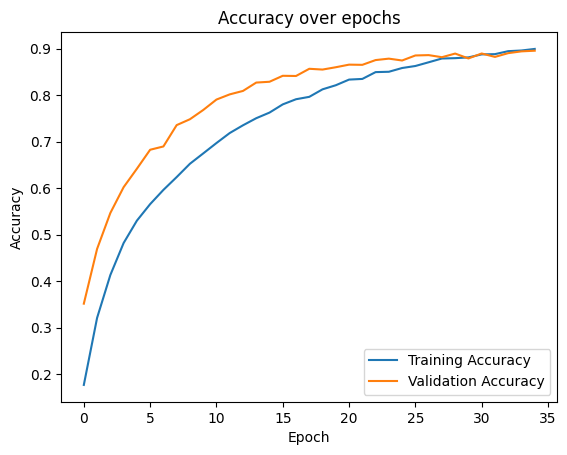

In [29]:

# Accuratezza
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


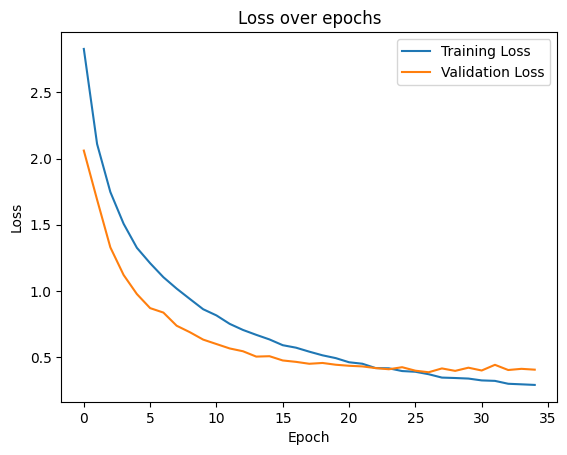

In [30]:
# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
save = input('vuoi salvare il modello ?')
if save == 'si':
    model.save(filepath=r'C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\model\lego_casa.keras')
    print('Modello salvato')
else: print('modello non salvato')


Modello salvato
